# Generation of artifact labels for training artifact segmenation model

In [11]:
import cv2
import numpy as np
import glob
from matplotlib import pyplot as plt
%matplotlib inline

from utils.resnet import build_ResNet
from utils.scorecam import ScoreCam, read_and_preprocess_img, edge_map

### Build previously trained artifact classifier (from ResNet50_Artifact_Classifer.ipynb):

In [12]:
model = build_ResNet()
model.load_weights('./weights/resnet_weight_576_16bit_081123-test_tiff_utilsdebug.h5')

### Visual demo of Score-CAM saliency maps and edge maps

43/43 [==============================] - 4s 86ms/step


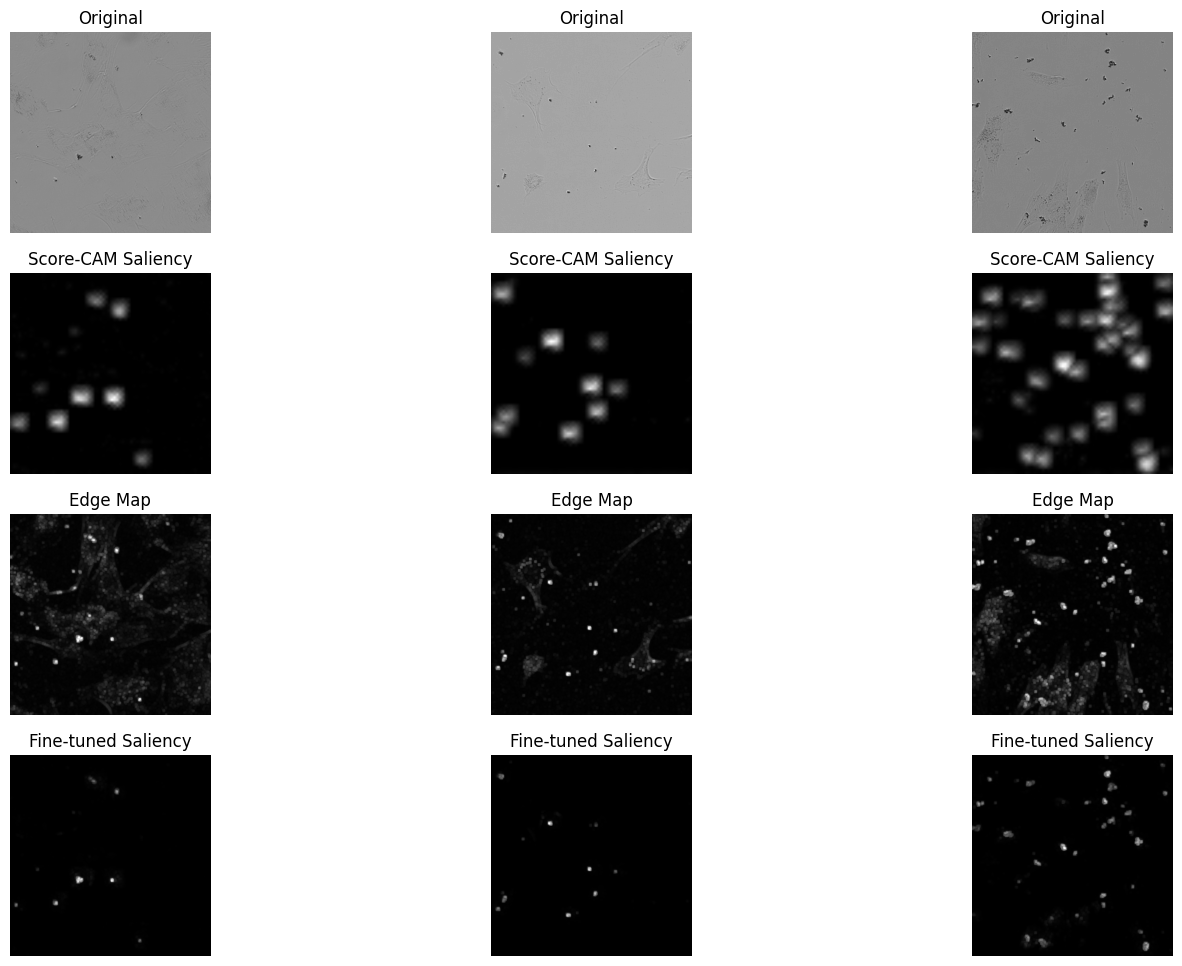

In [13]:
fig = plt.figure(figsize=(30, 12))
for i, img_path in enumerate(glob.glob('D:/Chapter 5/Re-run/Artifact_Classifier/classified_dirty/*.tiff')[:3]):
    
    orig_img = cv2.imread(img_path, -1)
    img_array = read_and_preprocess_img(img_path, size=(576,576))
    
    score_cam=ScoreCam(model,img_array,layer_name="act_last")
    edge = edge_map(orig_img)
    score_cam_resized = cv2.resize(score_cam, (orig_img.shape[1], orig_img.shape[0]))
    tuned_scorecam = edge * score_cam_resized
    
    ax = fig.add_subplot(4, 5, i%5 + 1)
    ax.imshow(orig_img, cmap='gray')
    ax.set_title("Original")
    ax.axis('off')
    
    ax = fig.add_subplot(4, 5, 5 + i%5 + 1)
    ax.imshow(score_cam_resized, cmap='gray')
    ax.set_title("Score-CAM Saliency")
    ax.axis('off')
    
    ax = fig.add_subplot(4, 5, 10 + i%5 + 1)
    ax.imshow(edge, cmap='gray')
    ax.set_title("Edge Map")
    ax.axis('off')
    
    ax = fig.add_subplot(4, 5, 15 + i%5 + 1)
    ax.imshow(tuned_scorecam, cmap='gray')
    ax.set_title("Fine-tuned Saliency")
    ax.axis('off')
    
    if (i+1)%5 == 0:
        plt.savefig(f"./results/Score-CAM_{i//5}.png")
        plt.show()
        fig = plt.figure(figsize=(30, 12))

### Generate fine-tuned saliency maps for full train/test dataset of artifact segmentation model

In [14]:
for i, img_path in enumerate(glob.glob('D:/Chapter 5/Re-run/Artifact_Classifier/classified_dirty/*.tiff')[:]):

    img_array = read_and_preprocess_img(img_path, size=(576,576))
    score_cam=ScoreCam(model,img_array,layer_name="act_last")
    
    img_gray = cv2.imread(img_path, -1)
    edge = edge_map(img_gray)
    score_cam_resized = cv2.resize(score_cam, (img_gray.shape[1], img_gray.shape[0]))
    tuned_scorecam = edge * score_cam_resized
    
    img_name = img_path.split('\\')[-1]
    plt.imsave(f"D:/Chapter 5/Re-run/artifact_segmentation/grad_masks/{img_name.split('.tiff')[0]}_Mask.tiff", tuned_scorecam)
    
    #If wanting the original score-CAM saliency map:
    #plt.imsave(f"D:/Chapter 5/Re-run/artifact_segmentation/sc_masks/{img_name.split('.tiff_')[0]}_Mask.tiff", score_cam_resized)

43/43 [==============================] - 4s 84ms/step
